# Лабораторная работа №3


# Лабораторная работа №3

ФИО: Толабаев Минкаил Адамович
Группа: БИВТ-22-СП-3

Отправлять можно следующими способами:
1. Запушить этот ноутбук в GitHub в репозиторий, где у вас лежат ноутбуки с лабами

Deadlines:
- Занятие №7 в семестре (Занятие №3 очное)

Что необходимо сделать:  
- Обучить различного рода модели машинного обучения и сравнить их между собой  

---
## Читайте задание внимательно

Исходные данные:
1. В [табличке](https://docs.google.com/spreadsheets/d/1k2MYXEp_OVQrink_XRC1PwoM0ZuNMeNz4VTWY7cI3hE/edit?usp=sharing) необходимо узнать название своего датасета 
2. Скачать нужны вам данные можно в [Google Drive](https://drive.google.com/drive/folders/1Phm-Fq1GL-VX7NS-DCEMRh_Fo1wU7DQ9?usp=sharing)
  
---
Теперь по пунктам, что я от вас жду:  
1. Загрузить необходимые данные к себе и считать (read) их в переменную.
2. Понять, у вас задача классификации (бинарной или многоклассовой) или регрессии (**если у вас многоклассовая классификация, прочтите P.S.S. внизу**).
3. Сделать предобработку данных:  
     1. Разделить выборку на тренировочную (train) и тестовую (test). _Обратите внимание, что обучать скейлеры и определять, какими значениями вы будете заполнять пропуски, вы будете на train выборке, а применять и на train, и на test_.
     2. Проверить пропуски в данных. Если они есть, заполнить одной из стратегий, предложенных в ноутбуке для семинара №3. P.S. Для численных и категориальных переменных будут разные стратегии.
     3. Отнормировать численные переменные (`StandardScaler`, `MinMaxScaler`).
     4. Закодировать категориальные признаки по одной из стратегий.
4. Обучить на тренировочном множестве:
     1. Линейную модель (`LogisticRegression`, `LinearRegression`)
     2. Деревянную модель (`DecisionTreeClassifier`, `DecisionTreeRegressor`) (тут советую попробовать разные глубины деревьев)
     3. K-ближайших соседей (`KNeighborsClassifier`, `KNeighborsRegressor`) (тут тоже есть смысл попробовать разные `k`)
     4. Случайный лес (`RandomForestClassifier`, `RandomForestRegressor`) 
5. Посчитайте метрики на train и test множествах:
     1. Для задачи классификации -- Accuracy, ROC-AUC (график + значение), PR-кривую (график), F1-score
     2. Для задачи регрессии -- MAE, RMSE, MAPE
6. Сравните метрики относительно train/test, так и относительно разных моделей. Ответьте на следующие вопросы:
     1. Какая модель справилась лучше с поставленной задачей?
     2. Имеет ли место переобучение?
     3. Имеет ли место недообучение?
     4. Как можно улучшить метрики моделей?

---
P.S.  
Просьба -- делать каждое задание в отдельных ячейках и с отдельными заголовками (как пункт 1 и 2 в этом ноутбуке) типа  
- Заголовок
- Ячейки с кодом
- Другой заголовок
- Другие ячейки с кодом

P.S.S.  
Если вам повезло с многоклассовой классификацией, вам будет необходимо понять, умеет ли алгоритм работать с несколькими классами одновременно (обычно они не умеют). Поэтому вам может понадобиться такая штука, как OneVsRestClassifier ([ссылка](https://scikit-learn.org/stable/modules/generated/sklearn.multiclass.OneVsRestClassifier.html#sklearn.multiclass.OneVsRestClassifier)), но советую ознакомиться с этой [страницей](https://scikit-learn.org/stable/modules/multiclass.html), здесь представлена более полная информация.

In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, label_binarize
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, precision_recall_curve, roc_curve, auc
import matplotlib.pyplot as plt

### Препроцесс данных

In [2]:
df = pd.read_csv('JobSurveyIndia.csv')

In [3]:
df.isna().sum()

Unnamed: 0               0
Employment Sector        0
Employment Background    0
Public Dealing           0
Degree                   0
IdealNumberOfWorkdays    0
IdealYearlyIncome        0
dtype: int64

In [4]:
df = df.drop('Unnamed: 0', axis=1)

In [5]:
df.head()

,Employment Sector,Employment Background,Public Dealing,Degree,IdealNumberOfWorkdays,IdealYearlyIncome
0,Private Sector,Technical,No,Yes,4.0,More Than 1500K
1,Private Sector,Art,No,Yes,4.0,600K-900K
2,Government Sector,Technical,No,Yes,6.0,900K-1200K
3,Government Sector,Non-Technical,Yes,Yes,4.0,900K-1200K
4,Private Sector,Technical,No,Yes,5.0,1200K-1500K


In [6]:
df.describe()

,IdealNumberOfWorkdays
count,400.000000
mean,4.902500
std,0.805989
min,4.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,7.000000


In [7]:
def preproc_cat_features(sample):
    tok2id = {elem: idx for idx, elem in enumerate(sample.unique())}
    return sample.map(tok2id)

In [8]:
df['Employment Sector'] = preproc_cat_features(df['Employment Sector'])
df['Employment Background'] = preproc_cat_features(df['Employment Background'])
df['Public Dealing'] = preproc_cat_features(df['Public Dealing'])
df['Degree'] = preproc_cat_features(df['Degree'])
scaler = StandardScaler()
df['IdealNumberOfWorkdays'] = scaler.fit_transform(df[['IdealNumberOfWorkdays']])
df['IdealYearlyIncome'] = preproc_cat_features(df['IdealYearlyIncome'])

In [9]:
df

,Employment Sector,Employment Background,Public Dealing,Degree,IdealNumberOfWorkdays,IdealYearlyIncome
0,0,0,0,0,-1.121145,0
1,0,1,1,1,-1.121145,1
2,1,0,0,0,1.363387,2
3,1,2,2,1,-1.121145,2
4,0,0,0,0,0.121121,3
...,...,...,...,...,...,...
395,0,2,1,1,0.121121,1
396,1,2,2,2,-1.121145,2
397,1,2,2,2,-1.121145,2
398,1,2,0,2,0.121121,0


In [10]:
targets = df['IdealYearlyIncome']
df = df.drop('IdealYearlyIncome', axis=1)
train_X, val_X, train_y, val_y = train_test_split(df, targets, test_size=.2)

### Модельки 

In [11]:
logistic_regression_clf = LogisticRegression(multi_class='ovr', max_iter=10000)
tree_clf = DecisionTreeClassifier()
rand_forest_clf = RandomForestClassifier()
knn = KNeighborsClassifier()

In [12]:
models = {
    "Logistic Regression": logistic_regression_clf,
    "Decision Tree": tree_clf,
    "Random Forest": rand_forest_clf,
    "KNN": knn
}

classes = sorted(targets.unique())
train_y_bin = label_binarize(train_y, classes=classes)
val_y_bin = label_binarize(val_y, classes=classes)

c:\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(



Logistic Regression - Train Metrics:
Train Accuracy: 0.5375
Train F1-score: 0.4812708727169645
Train ROC-AUC: 0.742928559859218
Train PR-AUC: 0.5544173644385836

Logistic Regression - Test Metrics:
Test Accuracy: 0.525
Test F1-score: 0.45265151515151514
Test ROC-AUC: 0.7798000886766181
Test PR-AUC: 0.558190975119908


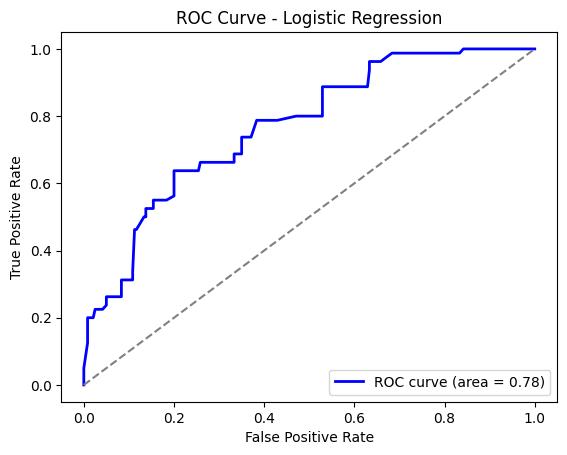

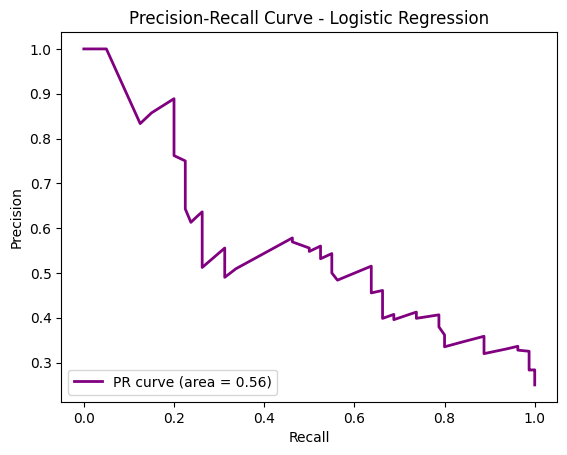

Logistic Regression - Недообучение: Низкие метрики на обеих выборках, возможно, требуется более сложная модель.

Decision Tree - Train Metrics:
Train Accuracy: 0.825
Train F1-score: 0.8227530229758162
Train ROC-AUC: 0.959684269774846
Train PR-AUC: 0.9298866468352454

Decision Tree - Test Metrics:
Test Accuracy: 0.85
Test F1-score: 0.8509114566777288
Test ROC-AUC: 0.9759659722924461
Test PR-AUC: 0.945540008125413


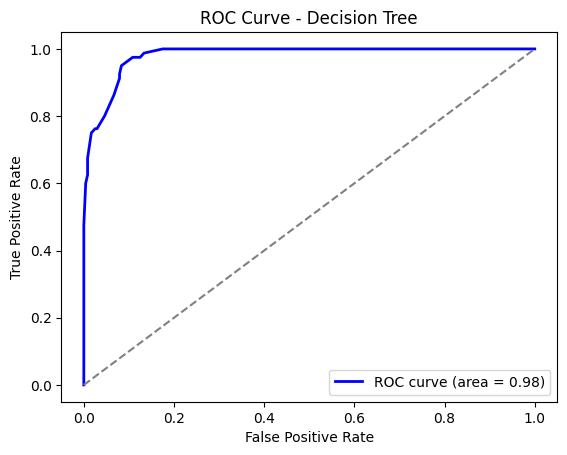

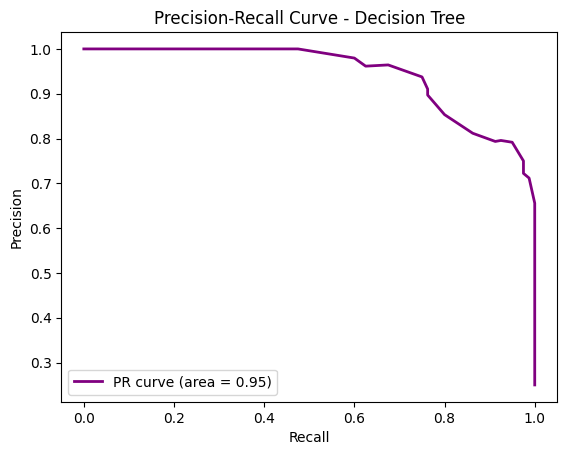

Decision Tree - Хороший баланс: Модель демонстрирует схожие метрики на обучающей и тестовой выборках.

Random Forest - Train Metrics:
Train Accuracy: 0.825
Train F1-score: 0.8227530229758162
Train ROC-AUC: 0.959684269774846
Train PR-AUC: 0.9298662834267238

Random Forest - Test Metrics:
Test Accuracy: 0.85
Test F1-score: 0.8509114566777288
Test ROC-AUC: 0.9759659722924461
Test PR-AUC: 0.9464750571450207


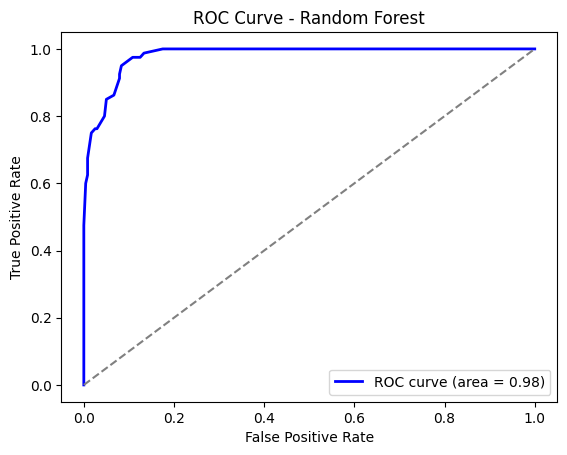

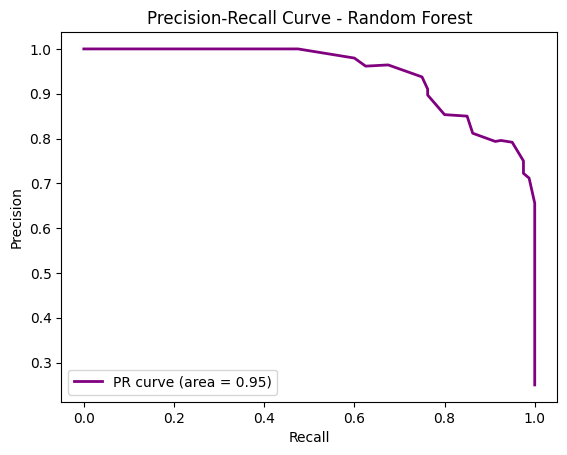

Random Forest - Хороший баланс: Модель демонстрирует схожие метрики на обучающей и тестовой выборках.

KNN - Train Metrics:
Train Accuracy: 0.771875
Train F1-score: 0.7697244899313211
Train ROC-AUC: 0.9468569957219204
Train PR-AUC: 0.9001357291488992

KNN - Test Metrics:
Test Accuracy: 0.775
Test F1-score: 0.7734664944674852
Test ROC-AUC: 0.9627231597657069
Test PR-AUC: 0.9135292681585472


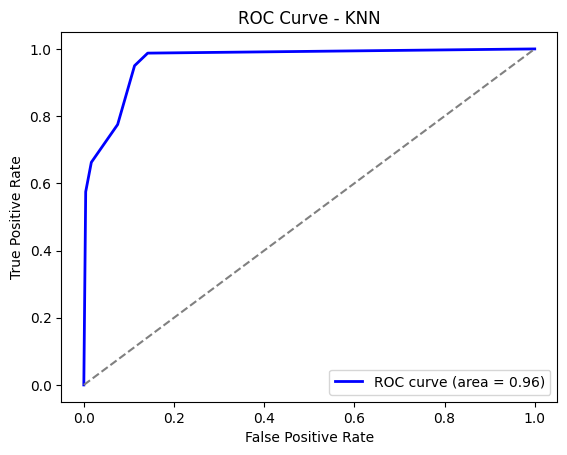

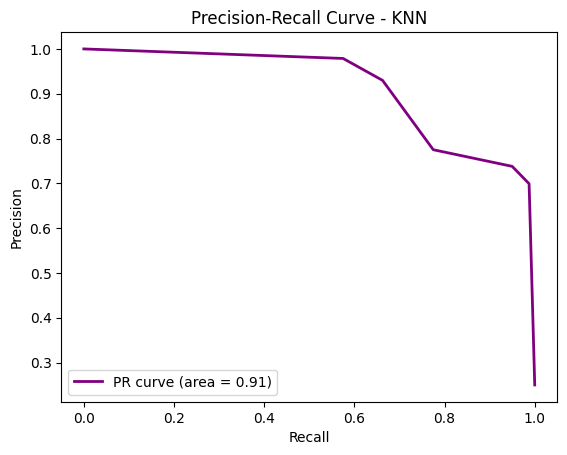

KNN - Хороший баланс: Модель демонстрирует схожие метрики на обучающей и тестовой выборках.


In [13]:
def evaluate_model(model, model_name):
    model.fit(train_X, train_y)

    y_train_pred = model.predict(train_X)
    y_val_pred = model.predict(val_X)
    y_train_pred_prob = model.predict_proba(train_X)
    y_val_pred_prob = model.predict_proba(val_X)

    train_accuracy = accuracy_score(train_y, y_train_pred)
    val_accuracy = accuracy_score(val_y, y_val_pred)
    train_f1 = f1_score(train_y, y_train_pred, average="weighted")
    val_f1 = f1_score(val_y, y_val_pred, average="weighted")

    train_roc_auc = roc_auc_score(train_y_bin, y_train_pred_prob, average="weighted", multi_class="ovr")
    val_roc_auc = roc_auc_score(val_y_bin, y_val_pred_prob, average="weighted", multi_class="ovr")

    train_precision, train_recall, _ = precision_recall_curve(train_y_bin.ravel(), y_train_pred_prob.ravel())
    val_precision, val_recall, _ = precision_recall_curve(val_y_bin.ravel(), y_val_pred_prob.ravel())
    train_pr_auc = auc(train_recall, train_precision)
    val_pr_auc = auc(val_recall, val_precision)

    print(f"\n{model_name} - Train Metrics:")
    print("Train Accuracy:", train_accuracy)
    print("Train F1-score:", train_f1)
    print("Train ROC-AUC:", train_roc_auc)
    print("Train PR-AUC:", train_pr_auc)
    
    print(f"\n{model_name} - Test Metrics:")
    print("Test Accuracy:", val_accuracy)
    print("Test F1-score:", val_f1)
    print("Test ROC-AUC:", val_roc_auc)
    print("Test PR-AUC:", val_pr_auc)

    fpr, tpr, _ = roc_curve(val_y_bin.ravel(), y_val_pred_prob.ravel())
    plt.figure()
    plt.plot(fpr, tpr, color="blue", lw=2, label=f"ROC curve (area = {val_roc_auc:.2f})")
    plt.plot([0, 1], [0, 1], color="grey", linestyle="--")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"ROC Curve - {model_name}")
    plt.legend(loc="lower right")
    plt.show()

    plt.figure()
    plt.plot(val_recall, val_precision, color="purple", lw=2, label=f"PR curve (area = {val_pr_auc:.2f})")
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title(f"Precision-Recall Curve - {model_name}")
    plt.legend(loc="lower left")
    plt.show()
    
    if abs(train_accuracy - val_accuracy) > 0.1:
        print(f"{model_name} - Переобучение: Метрики на обучающем наборе значительно выше, чем на тестовом.")
    elif train_accuracy < 0.7 and val_accuracy < 0.7:
        print(f"{model_name} - Недообучение: Низкие метрики на обеих выборках, возможно, требуется более сложная модель.")
    else:
        print(f"{model_name} - Хороший баланс: Модель демонстрирует схожие метрики на обучающей и тестовой выборках.")

for model_name, model in models.items():
    evaluate_model(model, model_name)

### Рекомендации по улучшению метрик:
- Применение кросс-валидации для получения более стабильных оценок.
- Настройка гиперпараметров, особенно для моделей Decision Tree и Random Forest.
- Использование более сложных моделей, таких как Gradient Boosting.
- Применение методов регуляризации для улучшения обобщающей способности.
- Аугментация данных или использование метода увеличения обучающего набора, если данные ограничены.